# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [90]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
from ExchangeEconomy import ExchangeEconomyClass

In [92]:
model = ExchangeEconomyClass()

(1.1, -0.1)

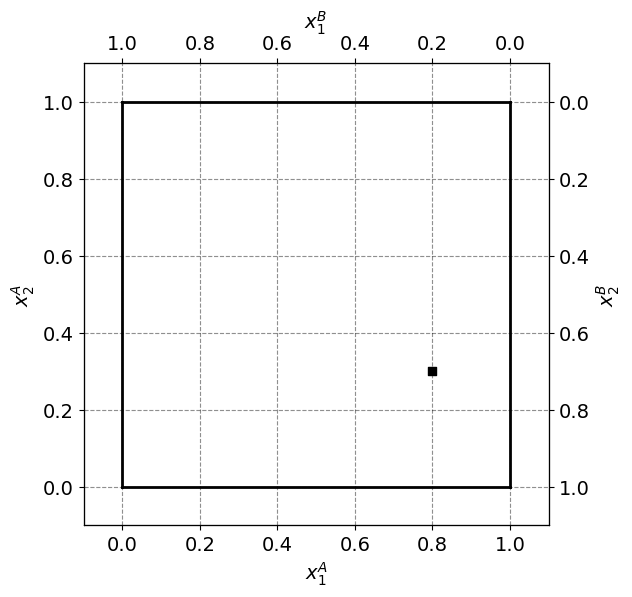

In [94]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0


import numpy as np
model = ExchangeEconomyClass()
# code for solving the model (remember documentation and comments)
def is_pareto(x1A, x2A): 
    x1B, x2B = 1 - x1A, 1 - x2A
    return model.utility_A(model.par, x1A, x2A) >= model.utility_A(par.w1A, par.w2A) and \
    model.utility_B(x1B, x2B) >= model.utility_B(x1B = 1- w1bar, x2B = 1- w2bar)




# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

In [95]:
model.par.alpha

0.3333333333333333

# Question 1

**Explain how you solve the model**

0.3333333333333333
namespace(alpha=0.3333333333333333, beta=0.6666666666666666, w1A=0.8, w2A=0.3)
0.41601676461038084
0.30365889718756617
[[0.08       0.96      ]
 [0.09333333 0.88      ]
 [0.09333333 0.89333333]
 ...
 [0.78666667 0.34666667]
 [0.78666667 0.36      ]
 [0.78666667 0.37333333]]


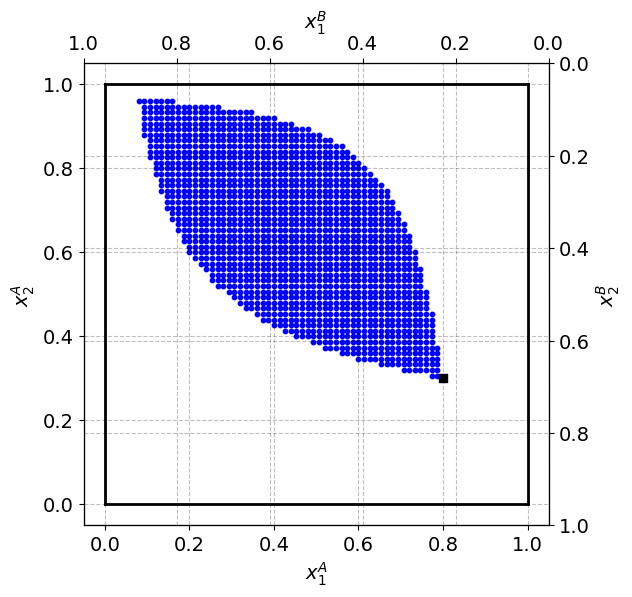

In [125]:
import numpy as np
model = ExchangeEconomyClass()
parameters = model.par
print(parameters.alpha)
print(parameters)
utility_personA = model.utility_A(parameters.w1A, parameters.w2A)
print(utility_personA)
utility_personB = model.utility_B(1-parameters.w1A, 1-parameters.w2A)
print(utility_personB)


# code for solving the model 

## here define the function for comparison
def is_pareto(x1A, x2A): 
    x1B, x2B = 1 - x1A, 1 - x2A
    return model.utility_A(x1A, x2A) >= utility_personA and model.utility_B(x1B, x2B) >= utility_personB


## loop over x1 and x2 and get all combinations
N = 75
pareto_improvements = []
for x1A in np.linspace(0, 1, N+1):
    for x2A in np.linspace(0, 1, N+1):
        if is_pareto(x1A, x2A):
            pareto_improvements.append((x1A, x2A))



# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

#Plotting Pareto improvements and initial endowment
pareto_improvements = np.array(pareto_improvements)
print(pareto_improvements)
ax_A.scatter(pareto_improvements[:, 0], pareto_improvements[:, 1], color='blue', label='Pareto Improvements', s=10)
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')



# Question 2

Explain your code and procedure

In [3]:
# code

# Question 3

Explain your code and procedure

In [4]:
# code

ADD CONCISE CONLUSION.

# Edgeworthbox

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


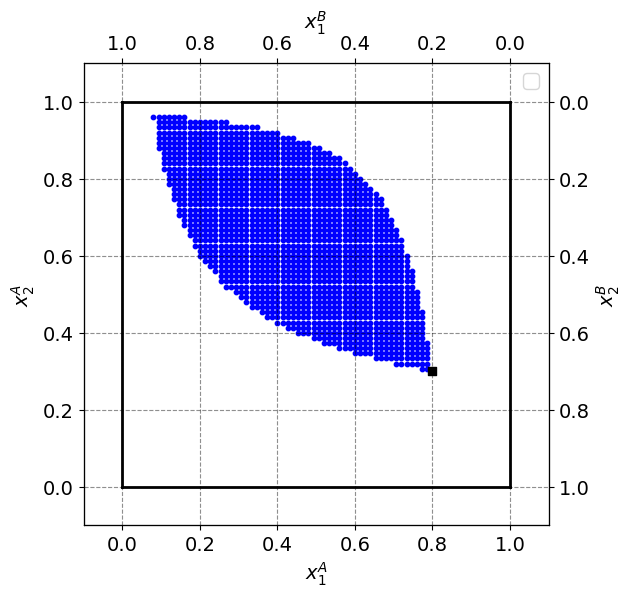

In [110]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the utility functions u_A and u_B are defined as in the previous discussion

# Simulate 'par' object for parameters (endowments of A)
class Parameters:
    def __init__(self, w1A, w2A):
        self.w1A = w1A
        self.w2A = w2A

# Given endowments for A
par = Parameters(w1A=0.8, w2A=0.3)

# Utility functions
def u_A(x1, x2, alpha=1/3):
    return x1**alpha * x2**(1-alpha)

def u_B(x1, x2, beta=2/3):
    return x1**beta * x2**(1-beta)

# Check for Pareto improvements
def is_pareto_improvement(x_A1, x_A2, omega_A1, omega_A2, omega_B1, omega_B2, alpha=1/3, beta=2/3):
    x_B1, x_B2 = 1 - x_A1, 1 - x_A2
    return u_A(x_A1, x_A2, alpha) >= u_A(omega_A1, omega_A2, alpha) and \
           u_B(x_B1, x_B2, beta) >= u_B(omega_B1, omega_B2, beta)

# Initial endowments and utilities
omega_A1, omega_A2 = par.w1A, par.w2A
omega_B1, omega_B2 = 1 - omega_A1, 1 - omega_A2

# Generate combinations of x_A1 and x_A2, and check for Pareto improvements
N = 75
pareto_improvements = []
for x_A1 in np.linspace(0, 1, N+1):
    for x_A2 in np.linspace(0, 1, N+1):
        if is_pareto_improvement(x_A1, x_A2, omega_A1, omega_A2, omega_B1, omega_B2):
            pareto_improvements.append((x_A1, x_A2))

# Plotting setup
fig = plt.figure(frameon=False, figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

# Axis labels and inverted axes for B
ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")
temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting Pareto improvements and initial endowment
pareto_improvements = np.array(pareto_improvements)
ax_A.scatter(pareto_improvements[:, 0], pareto_improvements[:, 1], color='blue', label='Pareto Improvements', s=10)
ax_A.scatter([omega_A1], [omega_A2], marker='s', color='black', label='Endowment')

# Drawing the box boundaries
w1bar, w2bar = 1.0, 1.0
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

plt.legend()
plt.show()
